## Import Dependencies

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Listing all the FAANG companies

In [ ]:
company_list = ["facebook","amazon","apple","netflix","google"]

In [ ]:
company_df = {}

for company in company_list:
  capitalized_name = company.capitalize()
  company_df[company] = pd.read_csv(f"{capitalized_name}_Historical_StockPrice.csv", index_col = "Date")

## 1. Basic Data Analysis and Visualisation for Netflix

There are six columns given:

High -> Highest Price of the stock for that particular date.

Low -> Lowest Price of the stock for that particular date.

Open -> Opening Price of the stock.

Close -> Closing Price of the stock.

Volume -> Total amount of Trading Activity.

AdjClose -> Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [ ]:
netflix = company_df["netflix"]

In [ ]:
netflix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-28,98.339996,101.440002,97.820000,101.209999,101.209999,12432200
2016-03-29,101.080002,104.330002,101.000000,104.129997,104.129997,16008900
2016-03-30,104.650002,104.910004,101.480003,102.190002,102.190002,14705000
2016-03-31,102.430000,103.529999,101.050003,102.230003,102.230003,9747500
2016-04-01,102.930000,105.790001,102.470001,105.699997,105.699997,14182400


In [ ]:
netflix.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-22,509.130005,529.309998,509.130005,523.109985,523.109985,3360600
2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
2021-03-24,533.780029,534.419983,520.000000,520.809998,520.809998,4102200
2021-03-25,516.989990,518.530029,497.000000,502.859985,502.859985,4926800
2021-03-26,502.820007,508.720001,496.679993,508.049988,508.049988,3464200


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 2016-03-28 to 2021-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9+ KB


In [ ]:
netflix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,292.419810,296.933730,287.681095,292.472302,292.472302,8.451711e+06
std,135.356764,137.677319,132.811799,135.274699,135.274699,5.513675e+06
min,85.430000,86.500000,84.500000,85.330002,85.330002,1.144000e+06
25%,160.012501,161.159996,157.865002,159.867504,159.867504,5.018600e+06
50%,308.220001,313.744995,302.919998,309.014999,309.014999,6.938700e+06
75%,371.059998,376.107498,364.540001,370.585007,370.585007,1.006235e+07
max,582.450012,593.289978,570.400024,586.340027,586.340027,5.841040e+07


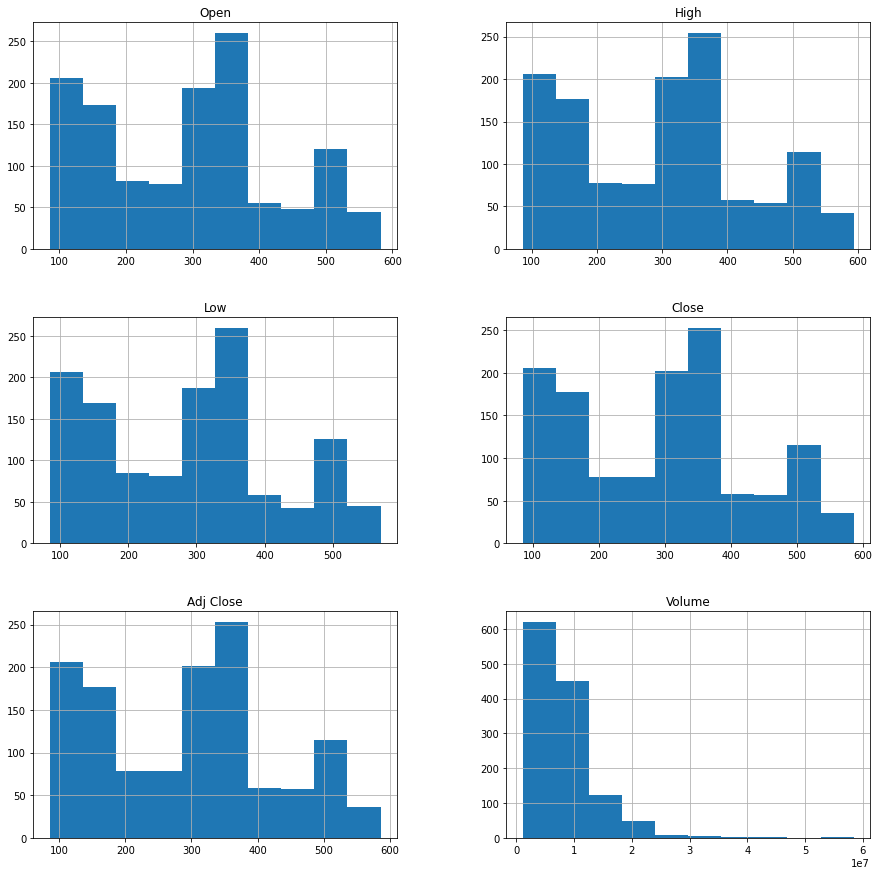

In [ ]:
histogram = netflix.hist(figsize = (15,15))

## 2. What was the change in price of the stock over time?

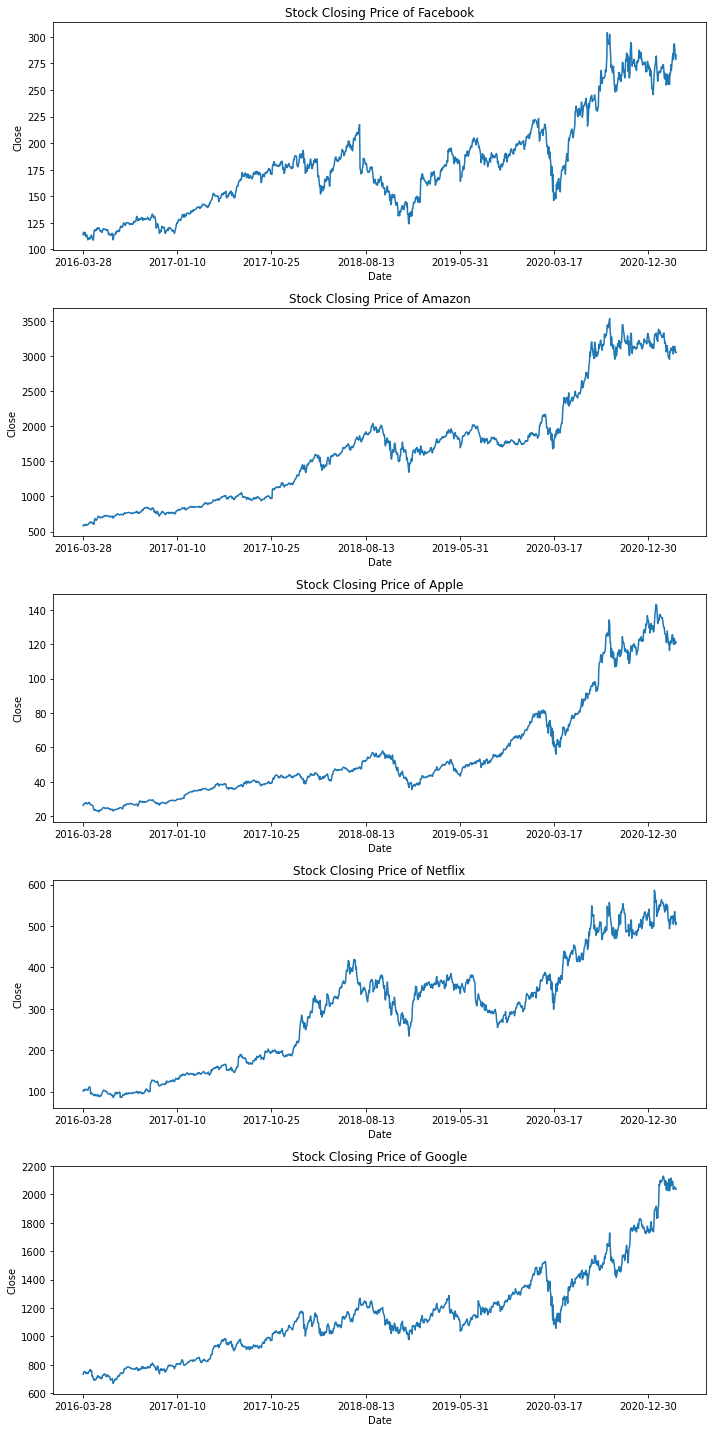

In [ ]:
# We will check out the historical view of the closing price

plt.figure(figsize=(10, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 1, i)
    df = company_df[company]
    df['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel('Date')
    plt.title(f"Stock Closing Price of {company.capitalize()}")
    
plt.tight_layout()

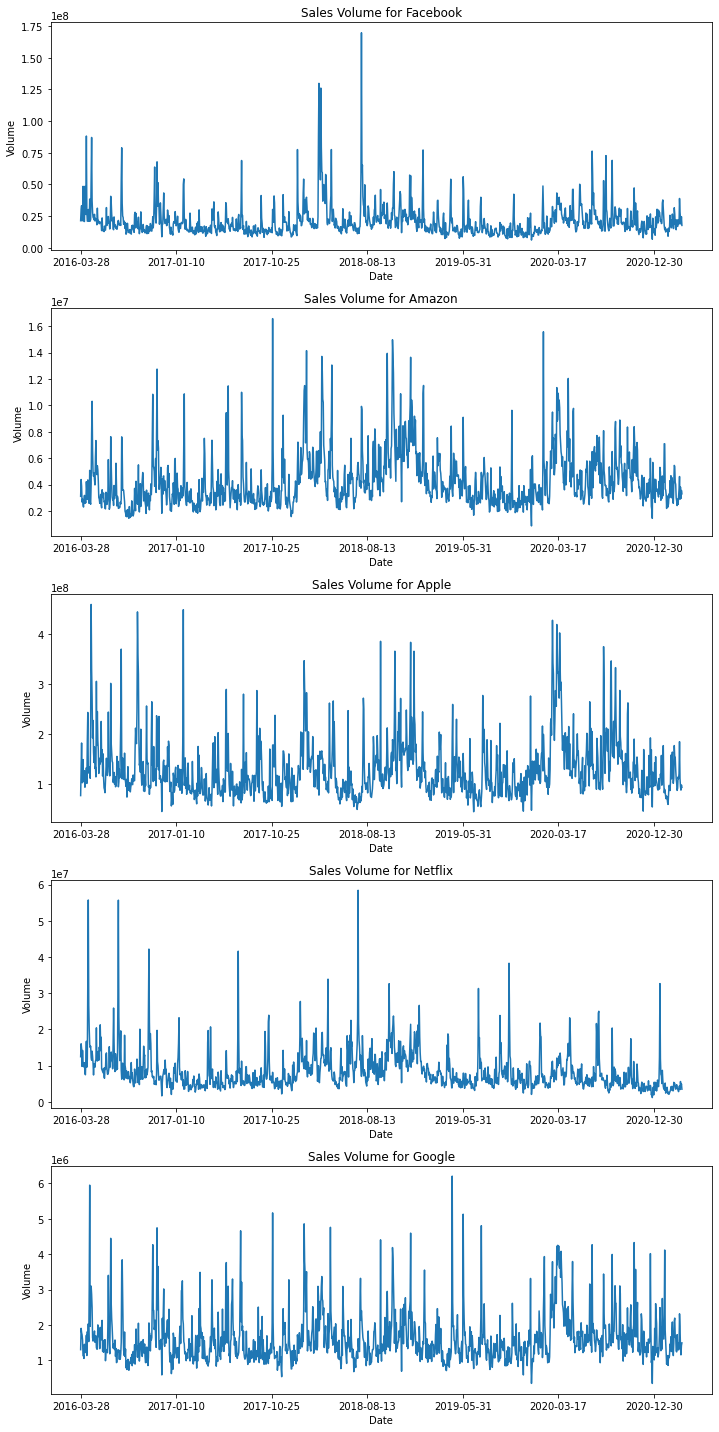

In [ ]:
# Now let's plot the total volume of stock being traded each day

plt.figure(figsize=(10, 20))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(5, 1, i)
    df = company_df[company]
    df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {company.capitalize()}")
    
plt.tight_layout()

#### Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 3. What was the moving average of the various stocks?

In [ ]:
ma_day = [10, 20, 50]

edited_df = {}
for company,df in company_df.items():
    edited_df[company] = df.copy(deep=True)

for i, company in enumerate(company_list, 1):
    df = edited_df[company]
    for ma in ma_day:
      column_name = f"MA for {ma} days"
      df[column_name] = df['Adj Close'].rolling(ma).mean()
    edited_df[company] = df

Text(0.5, 1.0, 'Google')

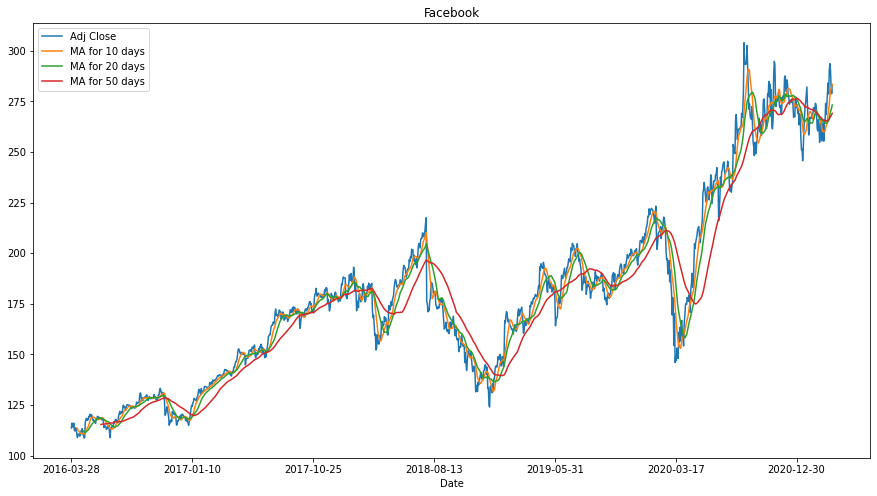

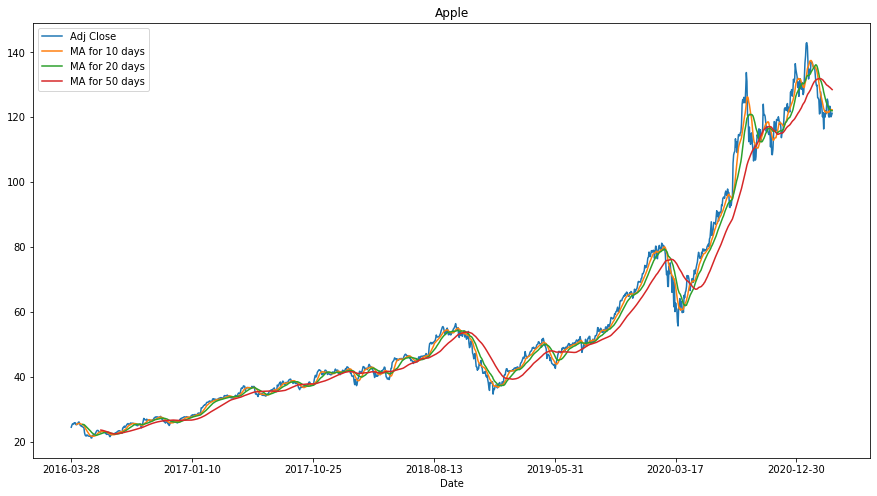

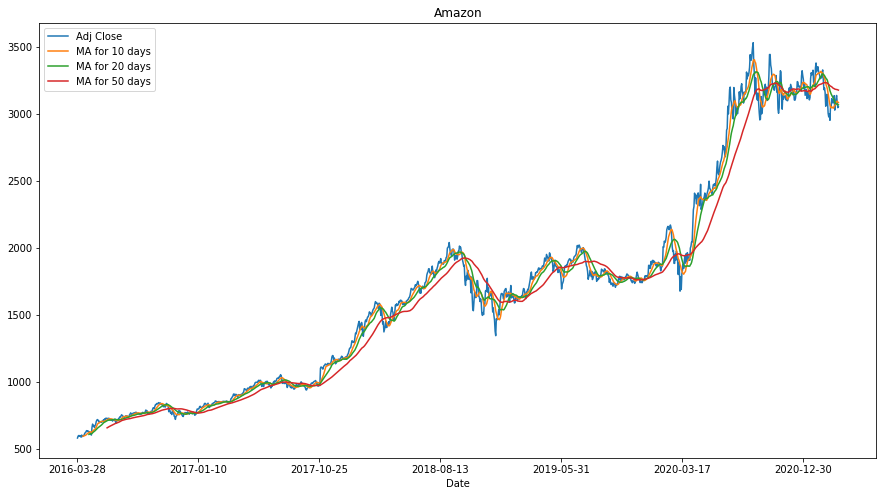

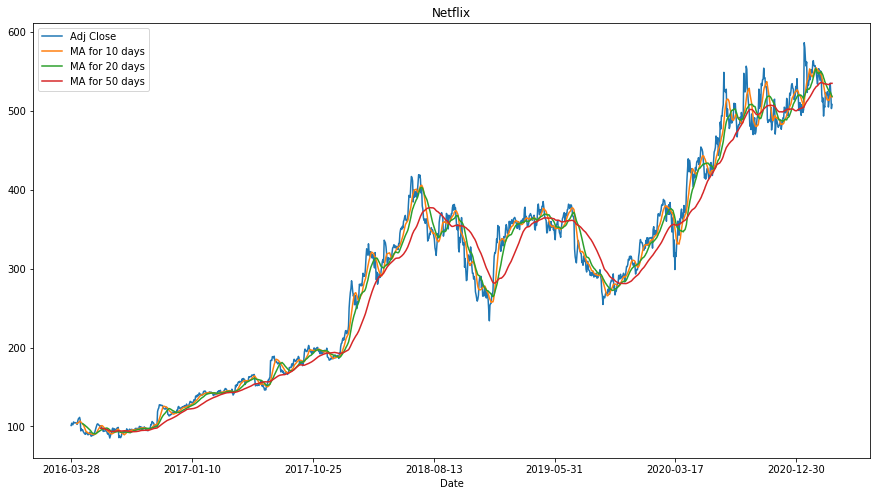

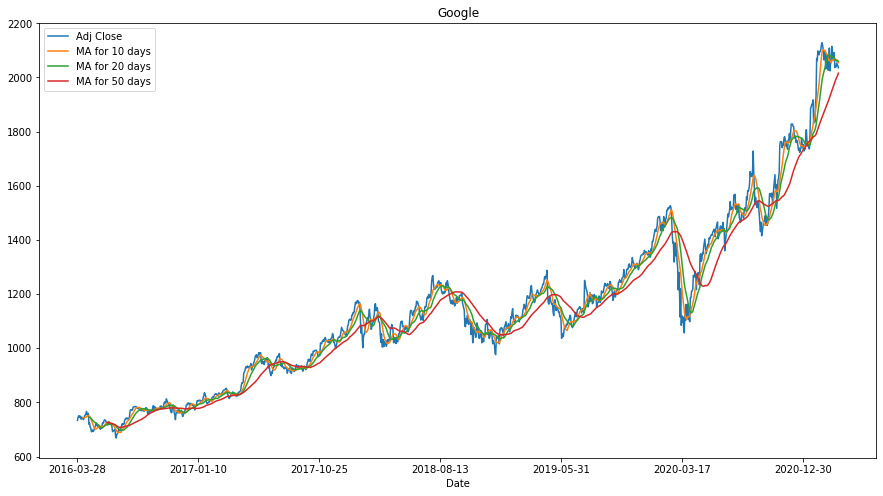

In [ ]:
edited_df["facebook"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize = (15,8))
plt.title("Facebook")

edited_df["apple"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize = (15,8))
plt.title("Apple")

edited_df["amazon"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize = (15,8))
plt.title("Amazon")

edited_df["netflix"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize = (15,8))
plt.title("Netflix")

edited_df["google"][['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(figsize = (15,8))
plt.title("Google")

# 4. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the FAANG companies' stock.


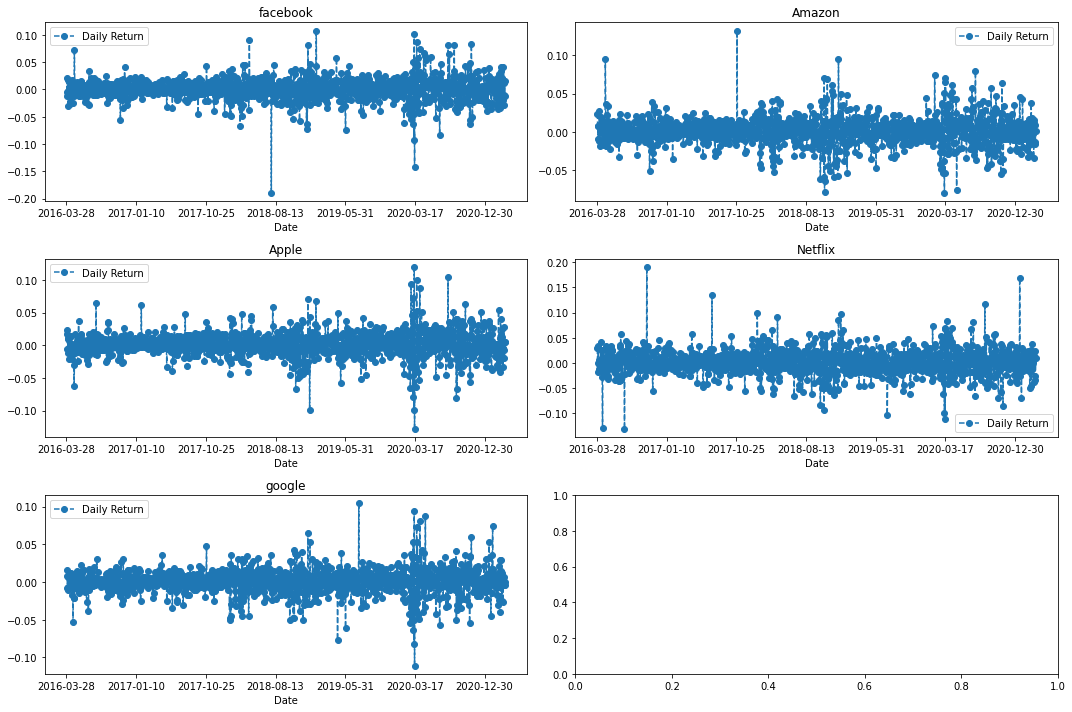

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    edited_df[company]['Daily Return'] = edited_df[company]['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

edited_df["facebook"]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('facebook')

edited_df["amazon"]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Amazon')

edited_df["apple"]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Apple')

edited_df["netflix"]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Netflix')

edited_df["google"]['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('google')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

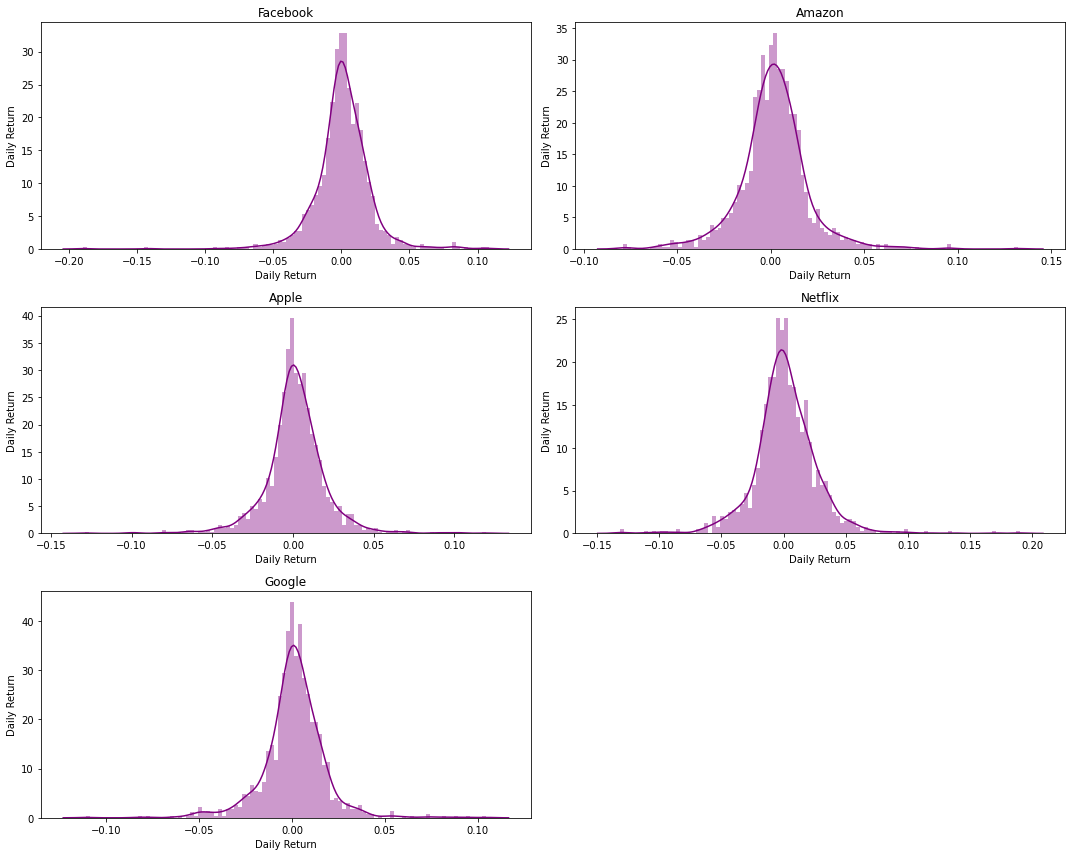

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(15, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(edited_df[company]['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company.capitalize()}')

plt.tight_layout()

# 5. What was the correlation between different stocks closing prices?
Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pd.DataFrame(index = company_df["facebook"].index)
for company in company_list:
  closing_df[company] = company_df[company]['Close']

# Let's take a quick look
closing_df.head() 

,facebook,amazon,apple,netflix,google
Date,,,,,
2016-03-28,113.690002,579.869995,26.297501,101.209999,733.530029
2016-03-29,116.139999,593.859985,26.920000,104.129997,744.770020
2016-03-30,114.699997,598.690002,27.389999,102.190002,750.530029
2016-03-31,114.099998,593.640015,27.247499,102.230003,744.950012
2016-04-01,116.059998,598.500000,27.497499,105.699997,749.909973


In [ ]:
# Make a new tech returns DataFrame
faang_returns = closing_df.pct_change()
faang_returns.head()

,facebook,amazon,apple,netflix,google
Date,,,,,
2016-03-28,NaN,NaN,NaN,NaN,NaN
2016-03-29,0.021550,0.024126,0.023671,0.028851,0.015323
2016-03-30,-0.012399,0.008133,0.017459,-0.018631,0.007734
2016-03-31,-0.005231,-0.008435,-0.005203,0.000391,-0.007435
2016-04-01,0.017178,0.008187,0.009175,0.033943,0.006658


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.


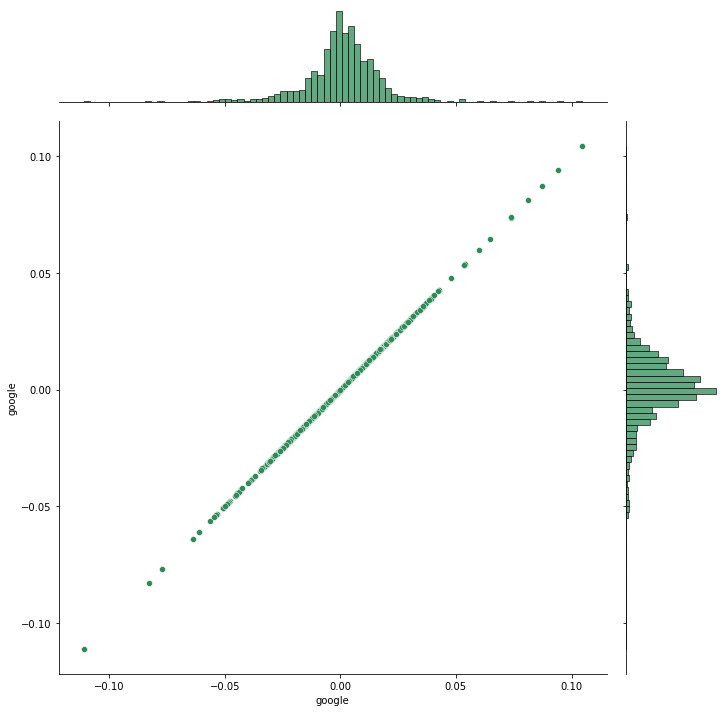

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='google', y='google', data=faang_returns, kind='scatter', color='seagreen', height = 10)

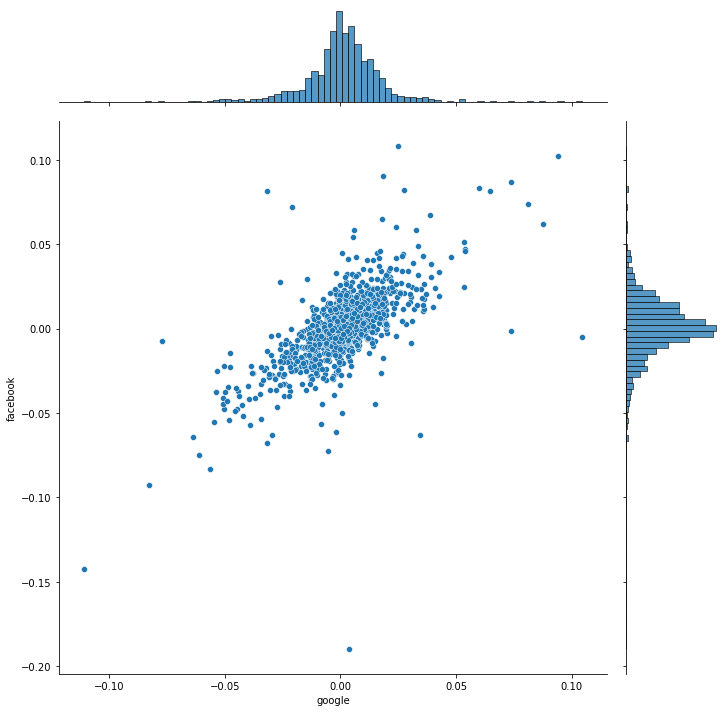

In [ ]:
# We'll use jointplot to compare the daily returns of Google and Facebook
sns.jointplot(x='google', y='facebook', data=faang_returns, kind='scatter', height = 10)

So now we can see that if two stocks are perfectly (and positively) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot


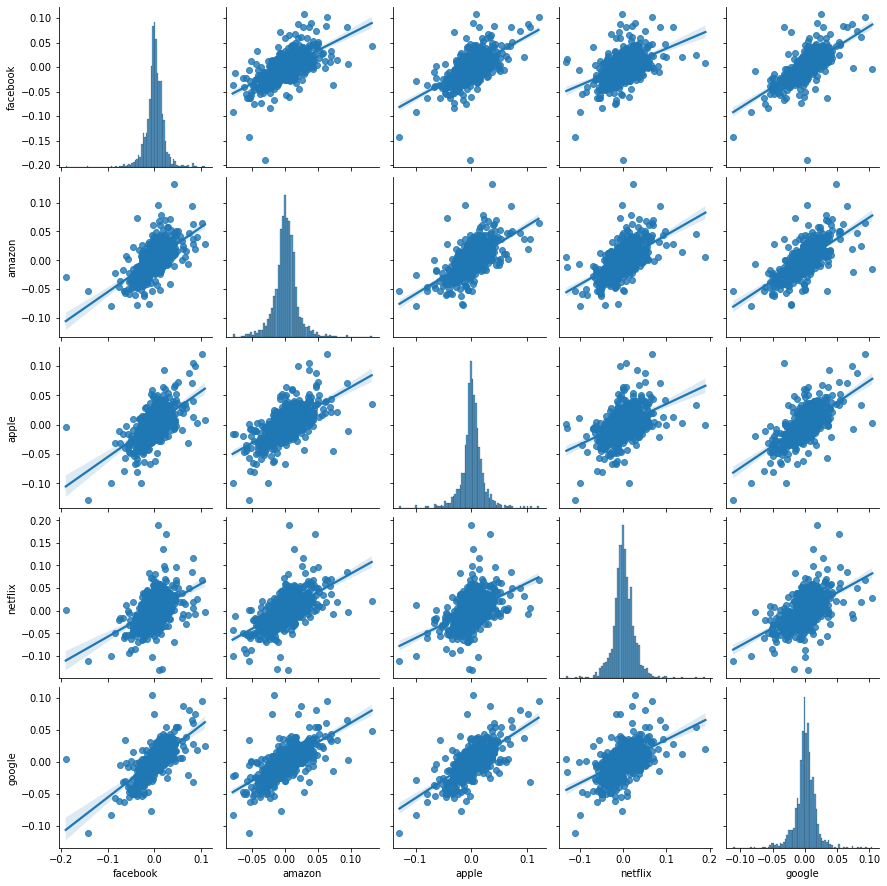

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(faang_returns, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

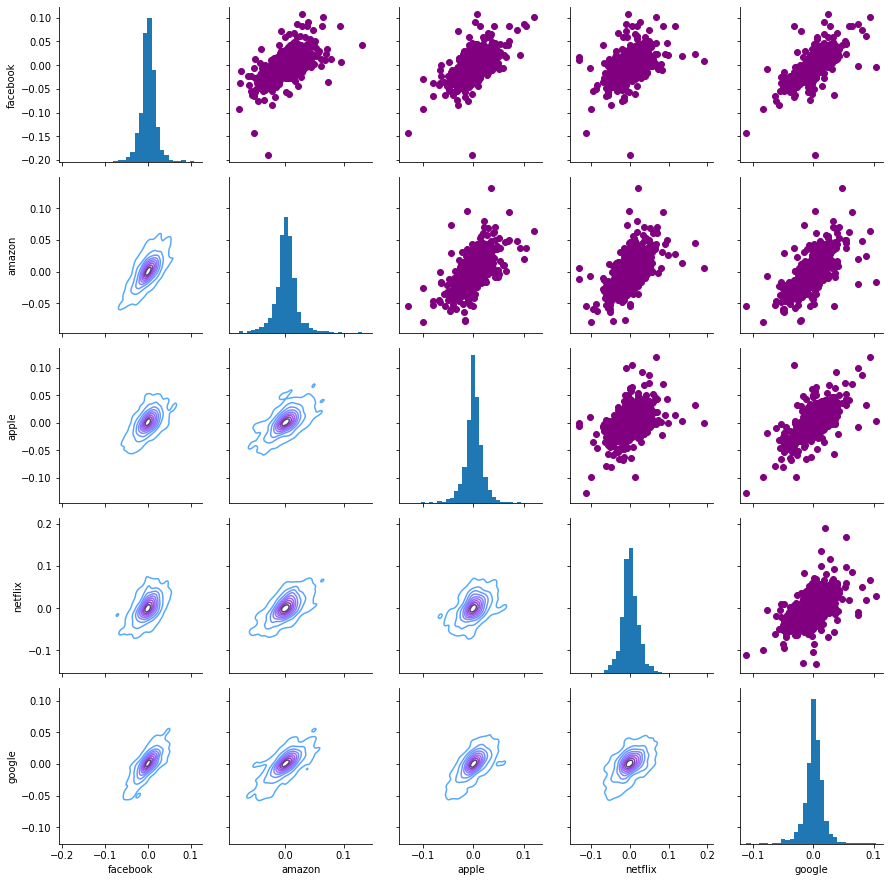

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(faang_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

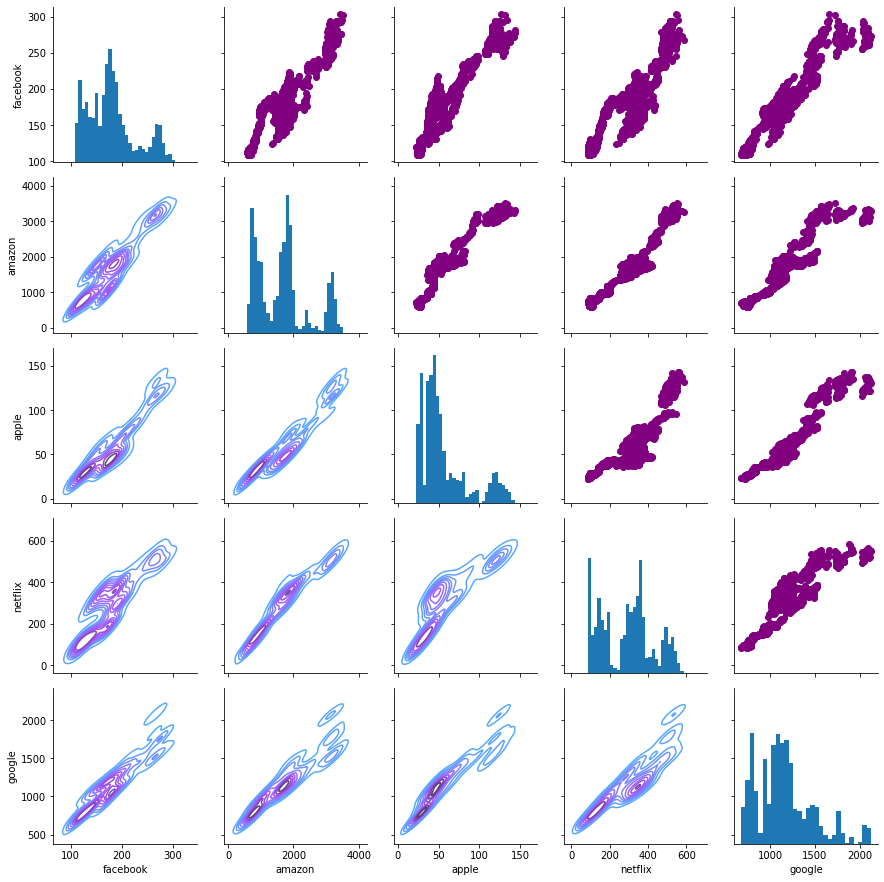

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)



Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Google and Facebook had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.


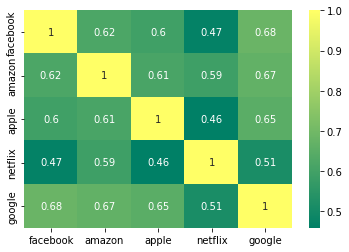

In [ ]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(faang_returns.corr(), annot=True, cmap='summer')

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Facebook.

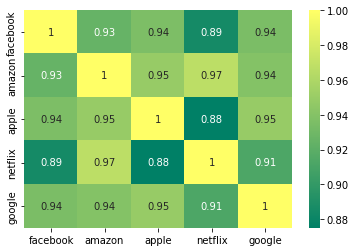

In [ ]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# 6. Return on Investment for FAANG Companies

In [ ]:
facebook = pd.read_csv("Facebook_Historical_StockPrice.csv")
apple = pd.read_csv("Apple_Historical_StockPrice.csv")
amazon = pd.read_csv("Amazon_Historical_StockPrice.csv")
google = pd.read_csv("Google_Historical_StockPrice.csv")
netflix = pd.read_csv("Netflix_Historical_StockPrice.csv")

df = pd.merge(apple, amazon[["Date", "Adj Close"]], on="Date", how="left")
df = pd.merge(df, netflix[["Date", "Adj Close"]], on="Date", how="left")
df = pd.merge(df, google[["Date", "Adj Close"]], on="Date", how="left")
df = pd.merge(df, facebook[["Date", "Adj Close"]], on="Date", how="left")

df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'apple', 'Volume',
       'amazon', 'netflix', 'google', 'facebook']

In [ ]:
df = df[['Date', 'apple', 'amazon', 'netflix', 'google', 'facebook']]
df

,Date,apple,amazon,netflix,google,facebook
0,2016-03-28,24.459534,579.869995,101.209999,733.530029,113.690002
1,2016-03-29,25.038527,593.859985,104.129997,744.770020,116.139999
2,2016-03-30,25.475679,598.690002,102.190002,750.530029,114.699997
3,2016-03-31,25.343138,593.640015,102.230003,744.950012,114.099998
4,2016-04-01,25.575666,598.500000,105.699997,749.909973,116.059998
...,...,...,...,...,...,...
1255,2021-03-22,123.389999,3110.870117,523.109985,2038.589966,293.540009
1256,2021-03-23,122.540001,3137.500000,535.090027,2052.959961,290.630005
1257,2021-03-24,120.089996,3087.070068,520.809998,2045.060059,282.140015
1258,2021-03-25,120.589996,3046.260010,502.859985,2044.359985,278.739990


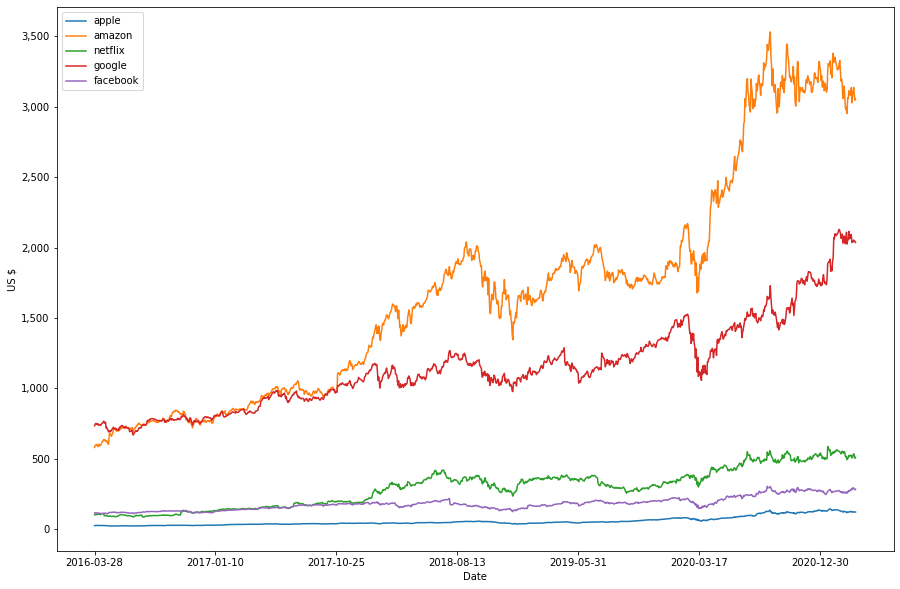

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

ax = df.plot(figsize = (15,10), x = "Date")
ax.set_ylabel("US $")
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
df = df.set_index("Date")
df.head()

,apple,amazon,netflix,google,facebook
Date,,,,,
2016-03-28,24.459534,579.869995,101.209999,733.530029,113.690002
2016-03-29,25.038527,593.859985,104.129997,744.770020,116.139999
2016-03-30,25.475679,598.690002,102.190002,750.530029,114.699997
2016-03-31,25.343138,593.640015,102.230003,744.950012,114.099998
2016-04-01,25.575666,598.500000,105.699997,749.909973,116.059998


In [ ]:
start_price_list = []
start_stock_list = []
end_price_list = []
end_value_list = []
roi_value_list = []
roi_percentage_list = []

investment_df = pd.DataFrame()
investment_df

# If bought U$200 worth of each

from tabulate import tabulate

for i in df.columns:
    start_price = round(float(df[i][:1]), 2)
    start_stock = round(200 / start_price, 2)

    end_price = round(float(df[i][-1]), 2)
    end_value = round(end_price * start_stock, 2)

    roi_value = round(end_value - 200, 2)
    roi_percentage = float(round((roi_value / 200) * 100, 2))
    
    start_price_list.append(start_price)
    start_stock_list.append(start_stock)
    end_price_list.append(end_price)
    end_value_list.append(end_value)
    roi_value_list.append(roi_value)
    roi_percentage_list.append(roi_percentage)

investment_df["Asset"] = df.columns
investment_df["Price point bought at"] = start_price_list
investment_df["Stock acquired"] = start_stock_list
investment_df["Current price"] = end_price_list
investment_df["Current value"] = end_value_list
investment_df["ROI value"] = roi_value_list
investment_df["ROI percentage"] = roi_percentage_list 

investment_df.sort_values("ROI percentage", ascending = False)

,Asset,Price point bought at,Stock acquired,Current price,Current value,ROI value,ROI percentage
1,amazon,579.87,0.34,3052.03,1037.69,837.69,418.85
2,netflix,101.21,1.98,508.05,1005.94,805.94,402.97
0,apple,24.46,8.18,121.21,991.50,791.50,395.75
3,google,733.53,0.27,2035.55,549.60,349.60,174.80
4,facebook,113.69,1.76,283.02,498.12,298.12,149.06


# 7. How much value do we put at risk by investing in a particular stock?

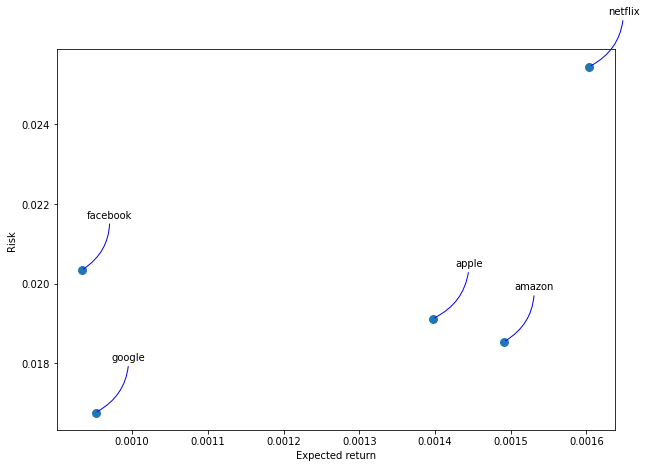

In [ ]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal faang_returns DataFrame
rets = faang_returns.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


# 8. Predicting the closing price stock price of GOOGLE

In [ ]:
google = company_df["google"]
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-03-28,736.789978,738.989990,732.500000,733.530029,733.530029,1301300
2016-03-29,734.590027,747.250000,728.760010,744.770020,744.770020,1903800
2016-03-30,750.099976,757.880005,748.739990,750.530029,750.530029,1782400
2016-03-31,749.250000,750.849976,740.940002,744.950012,744.950012,1718800
2016-04-01,738.599976,750.340027,737.000000,749.909973,749.909973,1576700


In [ ]:
# Create a new dataframe with only the 'Close column 
data = google.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1197

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04470396],
       [0.05240232],
       [0.0563474 ],
       ...,
       [0.94298141],
       [0.94250192],
       [0.93646792]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04470396, 0.05240232, 0.0563474 , 0.0525256 , 0.05592272,
       0.05275844, 0.04762849, 0.05303242, 0.04932709, 0.04855314,
       0.04646414, 0.05125168, 0.0571624 , 0.05817609, 0.06214855,
       0.06736069, 0.05867606, 0.05781307, 0.06224444, 0.03459471,
       0.03759461, 0.02731414, 0.02573886, 0.01558851, 0.01695147,
       0.020513  , 0.01650627, 0.01879388, 0.02271839, 0.02935515,
       0.0305743 , 0.03761514, 0.0322112 , 0.0308551 , 0.02915654,
       0.0330331 , 0.02600594, 0.02627992, 0.02195815, 0.02840997,
       0.02464298, 0.03549879, 0.03904661, 0.03825895, 0.04410805,
       0.04620387, 0.0451286 , 0.04256019, 0.03703984, 0.03307419,
       0.03314271, 0.04110819, 0.04131366, 0.03503302, 0.03431388,
       0.03425226, 0.03469742, 0.02883461, 0.01606792, 0.01743092])]
[0.018958249203852973]

[array([0.04470396, 0.05240232, 0.0563474 , 0.0525256 , 0.05592272,
       0.05275844, 0.04762849, 0.05303242, 0.04932709, 0.04855314,
       0.04646414, 0.05125168, 0.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
36/36 [==============================] - 7s 91ms/step - loss: 0.0076
Epoch 2/10
36/36 [==============================] - 3s 90ms/step - loss: 8.9851e-04
Epoch 3/10
36/36 [==============================] - 3s 92ms/step - loss: 8.0936e-04
Epoch 4/10
36/36 [==============================] - 3s 91ms/step - loss: 7.0215e-04
Epoch 5/10
36/36 [==============================] - 3s 91ms/step - loss: 7.0552e-04
Epoch 6/10
36/36 [==============================] - 3s 90ms/step - loss: 6.5262e-04
Epoch 7/10
36/36 [==============================] - 3s 92ms/step - loss: 6.5674e-04
Epoch 8/10
36/36 [==============================] - 3s 90ms/step - loss: 5.8957e-04
Epoch 9/10
36/36 [==============================] - 3s 91ms/step - loss: 5.3510e-04
Epoch 10/10
36/36 [==============================] - 3s 92ms/step - loss: 5.3135e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


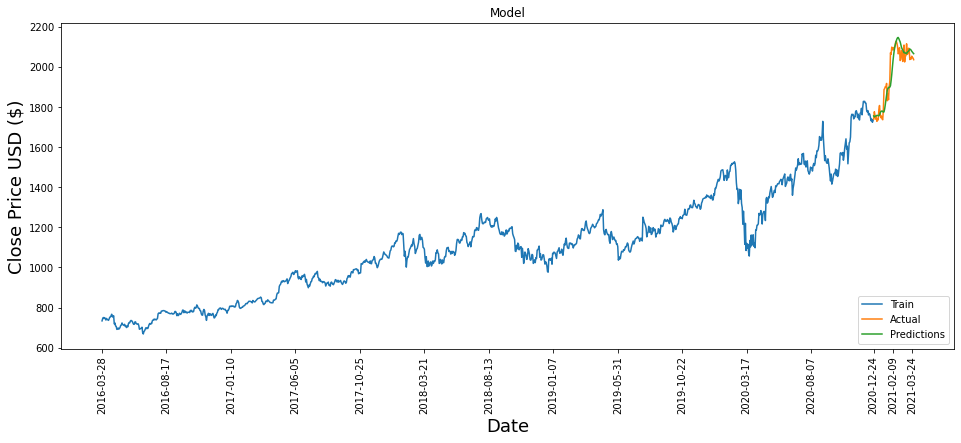

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

myticks = [[],[]]

for i in range(0, len(train.index.values), 100):
    myticks[0].append(i)
    myticks[1].append(train.index[i])

prev_len = len(train.index.values)
for i in range(0, len(valid.index.values), 30):
    myticks[0].append(prev_len + i)
    myticks[1].append(valid.index[i])

plt.figure(figsize=(16,6))
# Visualize the data
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.xticks(myticks[0], myticks[1], rotation = 'vertical')

plt.plot(train.index.values, train['Close'].values)
plt.plot(valid.index.values, valid[['Close', 'Predictions']].values)

plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-12-24,1738.849976,1755.337646
2020-12-28,1776.089966,1750.640869
2020-12-29,1758.719971,1751.998169
2020-12-30,1739.520020,1754.799927
2020-12-31,1751.880005,1756.189697
...,...,...
2021-03-22,2038.589966,2083.253418
2021-03-23,2052.959961,2077.733398
2021-03-24,2045.060059,2073.399658


In [ ]:
avg_err = 0

for i,row in valid.iterrows():
    predicted = row['Predictions']
    actual = row['Close'] 
    avg_err += abs(predicted-actual)/actual
  
avg_err /= valid.shape[0]

print(f"Average Error = {avg_err * 100}%")

Average Error = 2.0858351647561486%
